In [29]:
from scipy import *
from scipy.linalg import norm, pinv
import pandas as pd

from matplotlib import pyplot as plt
SIZE_TRAIN=40
SIZE_VAL=30
SIZE_TEST=30
 
class RBF:
     
    def __init__(self, indim, numCenters, outdim):
        self.indim = indim
        self.outdim = outdim
        self.numCenters = numCenters
        self.centers = [random.uniform(-1, 1, indim) for i in range(numCenters)]
        self.beta = 8
        self.W = random.random((self.numCenters, self.outdim))
         
    def _basisfunc(self, c, d):
        assert len(d) == self.indim
        return exp(-self.beta * norm(c-d)**2)
     
    def _calcAct(self, X):
        # calculate activations of RBFs
        G = zeros((X.shape[0], self.numCenters), float)
        for ci, c in enumerate(self.centers):
            for xi, x in enumerate(X):
                G[xi,ci] = self._basisfunc(c, x)
        return G
     
    def train(self, X, Y):
        """ X: matrix of dimensions n x indim 
            y: column vector of dimension n x 1 """
         
        # choose random center vectors from training set
        rnd_idx = random.permutation(X.shape[0])[:self.numCenters]
        self.centers = [X[i,:] for i in rnd_idx]
         
        # calculate activations of RBFs
        G = self._calcAct(X)
         
        # calculate output weights (pseudoinverse)
        self.W = dot(pinv(G), Y)
         
    def test(self, X):
        """ X: matrix of dimensions n x indim """
         
        G = self._calcAct(X)
        Y = dot(G, self.W)
        return Y
def read_data(file_name):
    df=pd.read_csv("data.txt",sep="  ",names=["X","y"],engine="python")
    X=df.X.values
    y=df.y.values 
def read_data(file_name):
    df=pd.read_csv("data.txt",sep="  ",names=["X","y"],engine="python")
    X=df.X.values
    y=df.y.values
    return X[0:SIZE_TRAIN],y[0:SIZE_TRAIN],X[SIZE_TRAIN:SIZE_VAL+SIZE_TRAIN],y[SIZE_TRAIN:SIZE_VAL+SIZE_TRAIN],X[-SIZE_TEST:],y[-SIZE_TEST:]      

In [30]:
X_train,y_train,X_val,y_val,X_test,y_test=read_data("data.txt")

# ----- 1D Example ------------------------------------------------
n = 100

x = mgrid[-1:1:complex(0,n)].reshape(n, 1)
x.shape
y = sin(3*(x+0.5)**3 - 1)
y.shape
x=X_train
y=y_train
n=len(x)
x=X_train.reshape(len(X_train),1)
y=y_train.reshape(len(X_train),1)

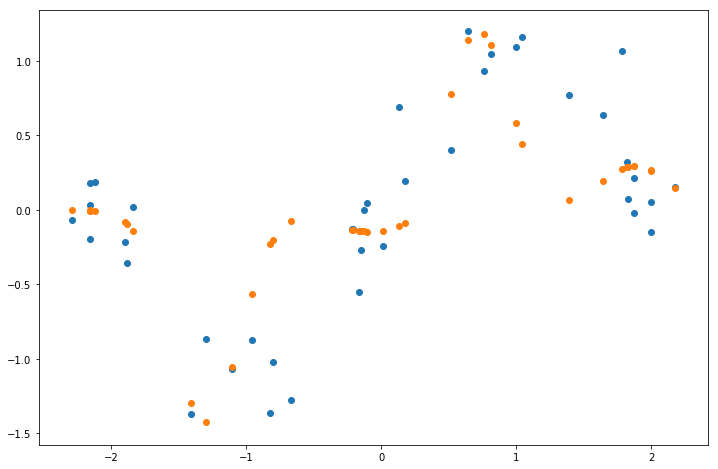

In [41]:

# set y and add random noise
# y += random.normal(0, 0.1, y.shape)

# rbf regression
rbf = RBF(1, 5, 1)
rbf.train(x, y)
z = rbf.test(x)

# plot original data
plt.figure(figsize=(12, 8))
plt.scatter(x, y)

# plot learned model
plt.scatter(x, z)

# plot rbfs
plt.plot(rbf.centers, zeros(rbf.numCenters), 'gs')

for c in rbf.centers:
    # RF prediction lines
    cx = arange(c-0.7, c+0.7, 0.01)
    cy = [rbf._basisfunc(array([cx_]), array([c])) for cx_ in cx]
    plt.scatter(cx, cy)

plt.show()